In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
forest = pd.read_csv("forestfires.csv")
forest


,size_category,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,small,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,small,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,small,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,small,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,small,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,large,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,large,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,large,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,small,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
forest.head()
forest.describe()

,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


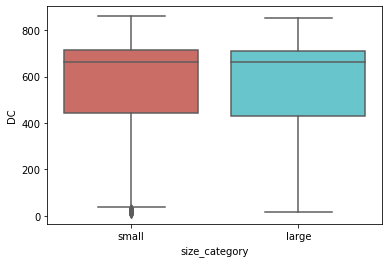

In [5]:
sns.boxplot(x="size_category",y="DC",data=forest,palette = "hls")

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train,test = train_test_split(forest,test_size = 0.3, random_state=1)
test.head()

,size_category,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
270,small,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52,0,...,0,0,0,0,0,0,0,0,0,0
90,small,96.9,624.2,8.9,14.7,59,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
133,small,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
221,large,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88,1,...,0,0,0,0,0,0,0,0,0,1
224,large,82.9,735.7,6.2,15.4,57,4.5,0.0,37.71,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_X  = test.iloc[:,1:]
test_y  = test.iloc[:,0]

In [33]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X,train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear==test_y)

1.0

In [34]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X,train_y)
pred_test_poly = model_poly.predict(test_X)
np.mean(pred_test_poly==test_y) 

0.782051282051282

In [35]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X,train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y)

0.7692307692307693

In [36]:
test_y.shape

(156,)